<a href="https://colab.research.google.com/github/vsrivatsan2096/iku/blob/master/Iku_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries

In [0]:
!pip install -U -q numpy
!pip install -U -q keras
!pip install -U -q scikit-learn
!pip install -U -q matplotlib
!pip install -U -q nltk
!pip install -U -q PyDrive 
!pip install -U -q pandas
!pip install https://download.pytorch.org/whl/cu100/torch-1.0.1.post2-cp36-cp36m-linux_x86_64.whl
!pip install -U -q torchvision
!pip install --quiet tensorflow-hub
!pip install --quiet seaborn
!pip install --quiet "tensorflow>=1.7"

    100% |████████████████████████████████| 17.3MB 2.2MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
    100% |████████████████████████████████| 1.4MB 15.0MB/s 
    100% |████████████████████████████████| 993kB 19.2MB/s 
    100% |████████████████████████████████| 10.1MB 4.2MB/s 


# Google Drive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import json

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
ls

adc.json  sample_data/


In [0]:
file_ids = ["1JslQ15FgNAcEdCsKGAGkOjOBBTq_jaUw", "1q7pTs8JeD7o5v2P38C0FrbXJGErPFfWZ", "1U6RBjW2SsO4WrAZ0F6NMSe5sh-mIKELT", "1e7LVpXX1eVPClSvhc9yl3nQknzWOdtEq", "1Re7ywNVhw4XWAfI7wJtZNNg2lp5288sZ", "1QhhwBbqsov2jcm9cy7pT8S00LlwwMvWo"]
file_names = ['google-embeddings-w2v.gz', 'common-crawl-embeddings-w2v.txt', 'crawl-300d-2M-subword.vec', 'doc2vec.bin', 'doc2vec.bin.syn0.npy', 'doc2vec.bin.syn1neg.npy']

# Mount Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Cloning Github

In [0]:
!git clone https://github.com/vsrivatsan2096/iku.git

Cloning into 'iku'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (188/188), done.
remote: Total 235 (delta 70), reused 173 (delta 29), pack-reused 0
Receiving objects: 100% (235/235), 10.38 MiB | 13.80 MiB/s, done.
Resolving deltas: 100% (70/70), done.


# Pre-Trained embeddings

In [0]:
drive = GoogleDrive(gauth)

In [0]:
# Google
download = drive.CreateFile({'id':file_ids[0]})
download.GetContentFile(file_names[0])

In [0]:
google_embeddings = 'google-embeddings-w2v.gz'

In [0]:
# Common Crawl
download = drive.CreateFile({'id':file_ids[1]})
download.GetContentFile(file_names[1])

In [0]:
common_crawl_embeddings = 'common-crawl-embeddings-w2v.txt'

In [0]:
!wget https://dl.fbaipublicfiles.com/infersent/infersent2.pkl

--2019-04-03 04:25:45--  https://dl.fbaipublicfiles.com/infersent/infersent2.pkl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:16a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154010676 (147M) [application/octet-stream]
Saving to: ‘infersent2.pkl’

infersent2.pkl      100%[===================>] 146.88M  29.8MB/s    in 5.4s    

2019-04-03 04:25:51 (27.4 MB/s) - ‘infersent2.pkl’ saved [154010676/154010676]



In [0]:
infersent_embeddings = 'infersent2.pkl'

In [0]:
# Common Crawl Fast Text
download = drive.CreateFile({'id':file_ids[2]})
download.GetContentFile(file_names[2])

In [0]:
infersent_crawl_embeddings = "crawl-300d-2M-subword.vec"

In [0]:
for i in range(3, 6):
  download = drive.CreateFile({'id':file_ids[i]})
  download.GetContentFile(file_names[i])

In [0]:
dbow_wiki_embeddings = "doc2vec.bin"

# Dataset

In [0]:
data_file_ids = ["1bqdQccb6176JhXU7CZbWnv3vTAi7BH_-"]
data_file_names = ['questions.csv']

In [0]:
for each_id, each_name in zip(data_file_ids, data_file_names):
    download = drive.CreateFile({'id':each_id})
    download.GetContentFile(each_name)

In [0]:
del download
del gauth
del drive

In [0]:
import numpy as np
import pandas as pd
import multiprocessing

In [0]:
questions = pd.read_csv("questions.csv")
questions.dropna(inplace=True)

In [0]:
questions1 = questions.iloc[:, 3].values
questions2 = questions.iloc[:, 4].values
is_duplicate_questions = questions.iloc[:, 5].values

In [0]:
questions.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
cores = multiprocessing.cpu_count()

In [0]:
length = is_duplicate_questions.shape[0]

In [0]:
X_scores = {}

# Scores

In [0]:
# https://github.com/makcedward/nlp/blob/master/sample/nlp-word_mover_distance.ipynb

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import jaccard_similarity_score
from sklearn.neighbors import DistanceMetric

In [0]:
def cosine_similarity_scores(sentence1, sentence2):
    return cosine_similarity(sentence1.reshape(1, -1), sentence2.reshape(1, -1))

In [0]:
def manhattan_distances_scores(sentence1, sentence2):
    return manhattan_distances(sentence1.reshape(1, -1), sentence2.reshape(1, -1))

In [0]:
def euclidean_distances_scores(sentence1, sentence2):
    return euclidean_distances(sentence1.reshape(1, -1), sentence2.reshape(1, -1))

In [0]:
def jaccard_similarity_scores(sentence1, sentence2):
    jac_score = 0
    try:
        jac_score = jaccard_similarity_score(sentence1.reshape(1, -1), sentence2.reshape(1, -1))
    finally:
        return jac_score

In [0]:
def minkowski_distances_scores(sentence1, sentence2):
    minkowski_distance = DistanceMetric.get_metric('minkowski')
    return minkowski_distance.pairwise(sentence1.reshape(1, -1), sentence2.reshape(1, -1))

In [0]:
def get_scores(sentences1, sentences2, length):
    scores = []
    for each in range(length):
        each_score = []
        each_score.append(cosine_similarity_scores(sentences1[each], sentences2[each])[0][0])
        each_score.append(manhattan_distances_scores(sentences1[each], sentences2[each])[0][0])
        each_score.append(euclidean_distances_scores(sentences1[each], sentences2[each])[0][0])
        #each_score.append(self.jaccard_similarity(self.sentences1[each], self.sentences2[each]))
        each_score.append(minkowski_distances_scores(sentences1[each], sentences2[each])[0][0])
        scores.append(np.asarray(each_score))
    return scores

# Natural Language Processing

In [0]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [0]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
lemma = WordNetLemmatizer()
stopword = stopwords.words("english")

In [0]:
sentences_1 = []
for i in questions1:
    tempx = re.sub(r"[^A-Za-z]", " ", str(i))
    tempx = tempx.lower().split()
    tempx = [word for word in tempx if word not in stopword]
    tempx = [lemma.lemmatize(word, pos="a") for word in tempx]
    tempx = [lemma.lemmatize(word, pos="r") for word in tempx]
    tempx = [lemma.lemmatize(word, pos="n") for word in tempx]
    tempx = [lemma.lemmatize(word, pos="v") for word in tempx]
    sentences_1.append(" ".join(tempx))
sentences_1 = np.asarray(sentences_1)

In [0]:
sentences_2 = []
for i in questions2:
    tempx = re.sub(r"[^A-Za-z]", " ", str(i))
    tempx = tempx.lower().split()
    tempx = [word for word in tempx if word not in stopword]
    tempx = [lemma.lemmatize(word, pos="a") for word in tempx]
    tempx = [lemma.lemmatize(word, pos="r") for word in tempx]
    tempx = [lemma.lemmatize(word, pos="n") for word in tempx]
    tempx = [lemma.lemmatize(word, pos="v") for word in tempx]
    sentences_2.append(" ".join(tempx))
sentences_2 = np.asarray(sentences_2)

# LSA Method

http://mccormickml.com/2016/03/25/lsa-for-text-classification-tutorial/

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True)

In [0]:
svd_model = TruncatedSVD(n_components=300,
                         algorithm='randomized',
                         n_iter=10, random_state=42)

In [0]:
lsa_model1 = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])

In [0]:
lsa_model2 = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])

In [0]:
lsa_1 = lsa_model1.fit(sentences_1)
lsa_2 = lsa_model2.fit(sentences_2)

In [0]:
X_scores['lsa'] = get_scores(lsa_1, lsa_2, length)

In [0]:
import joblib
joblib.dump(lsa_1, "lsa1")
joblib.dump(lsa_2, "lsa2")

['lsa2']

In [0]:
del vectorizer
del svd_model
del lsa_model1
del lsa_model2
del lsa_1
del lsa_2

# Word2Vec model(Using Mean to get the sentence vectors)

http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/

In [0]:
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

In [0]:
google_model = KeyedVectors.load_word2vec_format(google_embeddings, binary=True)
#wiki_model = KeyedVectors.load_word2vec_format("models/pretrained/glove/wiki/wiki.300d.txt", binary=False)
#common_crawl_model = KeyedVectors.load_word2vec_format("models/pretrained/glove/common_crawl/common_crawl.300d.txt", binary=False)

In [0]:
def sentence_vectorizer(model, sentence):
    vectors =[]
    num = 0
    for i in sentence.split():
        try:
            if num == 0:
                vectors = model[i]
            else:
                vectors = np.add(vectors, model[i])
            num += 1
        except:
            pass
    return np.array(vectors) / num

In [0]:
sent_vec1 = []
for each in sentences_1:
    temp = sentence_vectorizer(google_model, each)
    if temp.shape[0] != 0:
        sent_vec1.append(temp)
    else:
        sent_vec1.append(np.zeros((300,)))
sent_vec1 = np.asarray(sent_vec1)

In [0]:
sent_vec2 = []
for each in sentences_2:
    temp = sentence_vectorizer(google_model, each)
    if temp.shape[0] != 0:
        sent_vec2.append(temp)
    else:
        sent_vec2.append(np.zeros((300,)))
sent_vec2 = np.asarray(sent_vec2)

In [0]:
del google_model

In [0]:
X_scores['sent vector'] = get_scores(sent_vec1, sent_vec2, length)

In [0]:
del sent_vec1
del sent_vec2

# InferSent model

https://github.com/facebookresearch/InferSent

In [0]:
import torch
import numpy as np
from random import randint

**Load Model**

In [0]:
from iku.methods.infersent.models import InferSent
model_version = 2
params_model = {'bsize': 128, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': model_version}
model = InferSent(params_model)
model.load_state_dict(torch.load(infersent_embeddings))

In [0]:
use_cuda = True
model = model.cuda() if use_cuda else model # Keep it on CPU or put it on GPU

In [0]:
W2V_PATH = infersent_crawl_embeddings
model.set_w2v_path(W2V_PATH)

In [0]:
model.build_vocab_k_words(K=100000)

Vocab size : 100000


**Encode Sentences**

In [0]:
batch = 50000 # All the data crashes the RAM and GPU

In [0]:
X_scores['sentence vector'] = []

In [0]:
for i in range(0, length, batch):
    infersent_1 = model.encode(sentences_1[i:i+batch], bsize=128, tokenize=True, verbose=True)
    infersent_2 = model.encode(sentences_2[i:i+batch], bsize=128, tokenize=True, verbose=True)
    X_scores['sentence vector'].extend(get_scores(infersent_1, infersent_2, infersent_1.shape[0]))

Nb words kept : 351813/368855 (95.4%)
Speed : 2037.6 sentences/s (gpu mode, bsize=128)
Nb words kept : 356434/372214 (95.8%)
Speed : 2159.3 sentences/s (gpu mode, bsize=128)
Nb words kept : 351782/368682 (95.4%)
Speed : 2079.8 sentences/s (gpu mode, bsize=128)
Nb words kept : 356071/371723 (95.8%)
Speed : 2132.6 sentences/s (gpu mode, bsize=128)
Nb words kept : 351675/368630 (95.4%)
Speed : 1979.5 sentences/s (gpu mode, bsize=128)
Nb words kept : 356694/372433 (95.8%)
Speed : 2225.6 sentences/s (gpu mode, bsize=128)
Nb words kept : 352474/369541 (95.4%)
Speed : 1857.4 sentences/s (gpu mode, bsize=128)
Nb words kept : 357360/373032 (95.8%)
Speed : 2180.4 sentences/s (gpu mode, bsize=128)
Nb words kept : 352527/369219 (95.5%)
Speed : 2084.0 sentences/s (gpu mode, bsize=128)
Nb words kept : 355519/371279 (95.8%)
Speed : 2106.0 sentences/s (gpu mode, bsize=128)
Nb words kept : 352511/369636 (95.4%)
Speed : 1861.3 sentences/s (gpu mode, bsize=128)
Nb words kept : 357175/372840 (95.8%)
Speed

In [0]:
del model
del infersent_1
del infersent_2

# Sentence Encoder V2

https://tfhub.dev/google/universal-sentence-encoder/2

In [0]:
import tensorflow as tf
import tensorflow_hub as hub

W0401 06:33:39.893957 140023247116160 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [0]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [0]:
embed = hub.Module(module_url)

Instructions for updating:
Colocations handled automatically by placer.


W0401 06:33:58.268126 140023247116160 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
X_scores['sentence encoder'] = []

In [0]:
batch = 50000

In [0]:
# Run in cpu since GPU wont help
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )
sess = tf.Session()

In [0]:
with tf.Session(config=config) as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    for i in range(0, length, batch):
        print(i)
        sentences_embeddings_1 = session.run(embed(sentences_1[i:i+batch].tolist()))
        sentences_embeddings_2 = session.run(embed(sentences_2[i:i+batch].tolist()))
        X_scores['sentence encoder'].extend(get_scores(sentences_embeddings_1, sentences_embeddings_2, sentences_embeddings_1.shape[0]))

0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:34:43.706293 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:35:11.572540 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


50000
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:36:10.038043 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:36:35.471166 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


100000
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:37:34.453935 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:38:00.396581 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


150000
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:38:59.894641 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:39:26.024930 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


200000
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:40:25.739451 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:40:53.534143 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


250000
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:41:53.333753 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:42:20.812597 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


300000
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:43:17.420102 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:43:48.674592 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


350000
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:44:51.124536 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:45:20.733205 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


400000
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:46:10.632576 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0401 06:46:19.845982 140023247116160 saver.py:1483] Saver not created because there are no variables in the graph to restore


In [0]:
del embed

# Doc2Vec model

In [0]:
from gensim import utils
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence

In [0]:
model = Doc2Vec.load(dbow_wiki_embeddings)

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:566: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [0]:
sentence_vector1 = []
for i in range(length):
    sentence_vector1.append(model.infer_vector(sentences_1[i].split()))
sentence_vector1 = np.asarray(sentence_vector1)

In [0]:
sentence_vector2 = []
for i in range(length):
    sentence_vector2.append(model.infer_vector(sentences_2[i].split()))
sentence_vector2 = np.asarray(sentence_vector2)

In [0]:
X_scores['document vectors'] = get_scores(sentence_vector1, sentence_vector2, length)

In [0]:
del model
del sentence_vector1
del sentence_vector2

# Wordnet Similarity

In [0]:
import nltk
from nltk import word_tokenize
from nltk.corpus import wordnet as wn

In [0]:
from scipy import spatial
from nltk.metrics import edit_distance

In [0]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
def tokenize(q1, q2):
    return word_tokenize(q1), word_tokenize(q2)

In [0]:
def posTag(q1, q2):
    return nltk.pos_tag(q1), nltk.pos_tag(q2)

In [0]:
def stemmer(tag_q1, tag_q2):
    stem_q1 = []
    stem_q2 = []

    for token in tag_q1:
        stem_q1.append(stem(token))

    for token in tag_q2:
        stem_q2.append(stem(token))

    return stem_q1, stem_q2

In [0]:
class Lesk(object):

    def __init__(self, sentence):
        self.sentence = sentence
        self.meanings = {}
        for word in sentence:
            self.meanings[word] = ''

    def getSenses(self, word):
        # print word
        return wn.synsets(word.lower())

    def getGloss(self, senses):

        gloss = {}

        for sense in senses:
            gloss[sense.name()] = []

        for sense in senses:
            gloss[sense.name()] += word_tokenize(sense.definition())

        return gloss

    def getAll(self, word):
        senses = self.getSenses(word)

        if senses == []:
            return {word.lower(): senses}

        return self.getGloss(senses)

    def Score(self, set1, set2):
        # Base
        overlap = 0

        # Step
        for word in set1:
            if word in set2:
                overlap += 1

        return overlap

    def overlapScore(self, word1, word2):

        gloss_set1 = self.getAll(word1)
        if self.meanings[word2] == '':
            gloss_set2 = self.getAll(word2)
        else:
            # print 'here'
            gloss_set2 = self.getGloss([wn.synset(self.meanings[word2])])

        # print gloss_set2

        score = {}
        for i in gloss_set1.keys():
            score[i] = 0
            for j in gloss_set2.keys():
                score[i] += self.Score(gloss_set1[i], gloss_set2[j])

        bestSense = None
        max_score = 0
        for i in gloss_set1.keys():
            if score[i] > max_score:
                max_score = score[i]
                bestSense = i

        return bestSense, max_score

    def lesk(self, word, sentence):
        maxOverlap = 0
        context = sentence
        word_sense = []
        meaning = {}

        senses = self.getSenses(word)

        for sense in senses:
            meaning[sense.name()] = 0

        for word_context in context:
            if not word == word_context:
                score = self.overlapScore(word, word_context)
                if score[0] == None:
                    continue
                meaning[score[0]] += score[1]

        if senses == []:
            return word, None, None

        self.meanings[word] = max(meaning.keys(), key=lambda x: meaning[x])

        return word, self.meanings[word], wn.synset(self.meanings[word]).definition()

In [0]:
def path(set1, set2):
    return wn.path_similarity(set1, set2)

In [0]:
def wup(set1, set2):
    return wn.wup_similarity(set1, set2)

In [0]:

def edit(word1, word2):
    if float(edit_distance(word1, word2)) == 0.0:
        return 0.0
    return 1.0 / float(edit_distance(word1, word2))

In [0]:
def computePath(q1, q2):

    R = np.zeros((len(q1), len(q2)))

    for i in range(len(q1)):
        for j in range(len(q2)):
            if q1[i][1] == None or q2[j][1] == None:
                sim = edit(q1[i][0], q2[j][0])
            else:
                sim = path(wn.synset(q1[i][1]), wn.synset(q2[j][1]))

            if sim == None:
                sim = edit(q1[i][0], q2[j][0])

            R[i, j] = sim
    return R

In [0]:
#WUP Similarity

def computeWup(q1, q2):

    R = np.zeros((len(q1), len(q2)))

    for i in range(len(q1)):
        for j in range(len(q2)):
            if q1[i][1] == None or q2[j][1] == None:
                sim = edit(q1[i][0], q2[j][0])
            else:
                sim = wup(wn.synset(q1[i][1]), wn.synset(q2[j][1]))

            if sim == None:
                sim = edit(q1[i][0], q2[j][0])

            R[i, j] = sim

    # print R

    return R

In [0]:
def overallSim(q1, q2, R):

    sum_X = 0.0
    sum_Y = 0.0

    for i in range(len(q1)):
        max_i = 0.0
        for j in range(len(q2)):
            if R[i, j] > max_i:
                max_i = R[i, j]
        sum_X += max_i

    for i in range(len(q1)):
        max_j = 0.0
        for j in range(len(q2)):
            if R[i, j] > max_j:
                max_j = R[i, j]
        sum_Y += max_j
        
    if (float(len(q1)) + float(len(q2))) == 0.0:
        return 0.0
        
    overall = (sum_X + sum_Y) / (2 * (float(len(q1)) + float(len(q2))))

    return overall

In [0]:
#Sentence comparison
def semanticSimilarity(q1, q2):

    tokens_q1, tokens_q2 = tokenize(q1, q2)
    # stem_q1, stem_q2 = stemmer(tokens_q1, tokens_q2)
    tag_q1, tag_q2 = posTag(tokens_q1, tokens_q2)

    sentence = []
    for i, word in enumerate(tag_q1):
        if 'NN' in word[1] or 'JJ' in word[1] or 'VB' in word[1]:
            sentence.append(word[0])

    sense1 = Lesk(sentence)
    sentence1Means = []
    for word in sentence:
        sentence1Means.append(sense1.lesk(word, sentence))

    sentence = []
    for i, word in enumerate(tag_q2):
        if 'NN' in word[1] or 'JJ' in word[1] or 'VB' in word[1]:
            sentence.append(word[0])

    sense2 = Lesk(sentence)
    sentence2Means = []
    for word in sentence:
        sentence2Means.append(sense2.lesk(word, sentence))

    R1 = computePath(sentence1Means, sentence2Means)
    R2 = computeWup(sentence1Means, sentence2Means)

    R = (R1 + R2) / 2


    # print R

    return overallSim(sentence1Means, sentence2Means, R)

In [0]:
scores = []

In [0]:
for i in range(length):
   scores.append(semanticSimilarity(sentences_1[i], sentences_2[i]))

In [0]:
X_scores["wordnet"] = scores

# CNN and TimeDistributed

https://www.kaggle.com/zhihang/an-ensemble-approach-cnn-and-timedistributed

In [0]:
import pickle

In [0]:
import numpy as np
import pandas as pd

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [0]:
import re
import matplotlib.pyplot as plt
import datetime, time, json
from string import punctuation

In [0]:
from collections import defaultdict
from sklearn.metrics import accuracy_score

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [0]:
from keras import initializers
from keras import backend as K
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, Reshape, BatchNormalization, TimeDistributed, Lambda, Activation, LSTM, Flatten, Convolution1D, GRU, MaxPooling1D
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping

In [0]:
all_questions = sentences_1.tolist() + sentences_2.tolist()

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_questions)

In [0]:
import pickle

In [0]:
with open('cnn_time_distributed.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
question1_word_sequences = tokenizer.texts_to_sequences(sentences_1.tolist())
question2_word_sequences = tokenizer.texts_to_sequences(sentences_2.tolist())

In [0]:
word_index = tokenizer.word_index

In [0]:
max_question_len = 0
for each in range(length):
    max_question_len = max(max_question_len, len(question1_word_sequences[each]), len(question2_word_sequences[each]))
print(max_question_len)

97


In [0]:
train_q1 = pad_sequences(question1_word_sequences,
                              maxlen = max_question_len)

In [0]:
train_q2 = pad_sequences(question2_word_sequences,
                              maxlen = max_question_len)

In [0]:
embeddings_index = {}
with open(common_crawl_embeddings, encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding
print('Word embeddings:', len(embeddings_index))

Word embeddings: 2196016


In [0]:
embedding_dim = 300

In [0]:
nb_words = len(word_index)
word_embedding_matrix = np.zeros((nb_words + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        word_embedding_matrix[i] = embedding_vector

print('Null word embeddings: %d' % np.sum(np.sum(word_embedding_matrix, axis=1) == 0)) #75,334

Null word embeddings: 16082


In [0]:
units = 128 # Number of nodes in the Dense layers
dropout = 0.25 # Percentage of nodes to drop
nb_filter = 32 # Number of filters to use in Convolution1D
filter_length = 3 # Length of filter for Convolution1D

In [0]:
weights = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=2)
bias = bias_initializer='zeros'

In [0]:
from keras.layers import Input

In [0]:
model_1_input = Input(shape = (max_question_len,), dtype = 'int32', name = 'model_1_input')
model_1_embedding = Embedding(nb_words + 1,
                     embedding_dim,
                     #weights = [word_embedding_matrix], 
                     input_length = max_question_len,
                     #trainable = False
                             )(model_1_input)
model_1_conv_a = Convolution1D(filters = nb_filter, 
                         kernel_size = filter_length, 
                         padding = 'same')(model_1_embedding)
model_1_batch_a = BatchNormalization()(model_1_conv_a)
model_1_act = Activation('relu')(model_1_batch_a)
model_1_drop_a = Dropout(dropout)(model_1_act)
model_1_conv_b = Convolution1D(filters = nb_filter, 
                         kernel_size = filter_length, 
                         padding = 'same')(model_1_drop_a)
model_1_batch_b = BatchNormalization()(model_1_conv_b)
model_1_act_b = Activation('relu')(model_1_batch_b)
model_1_drop_b = Dropout(dropout)(model_1_act_b)
model_1_flat = Flatten()(model_1_drop_b)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model_2_input = Input(shape = (max_question_len,), dtype = 'int32', name = 'model_2_input')
model_2_embedding = Embedding(nb_words + 1,
                     embedding_dim,
                     weights = [word_embedding_matrix], 
                     input_length = max_question_len,
                     trainable = False)(model_2_input)
model_2_conv_a = Convolution1D(filters = nb_filter, 
                         kernel_size = filter_length, 
                         padding = 'same')(model_2_embedding)
model_2_batch_a = BatchNormalization()(model_2_conv_a)
model_2_act = Activation('relu')(model_2_batch_a)
model_2_drop_a = Dropout(dropout)(model_2_act)
model_2_conv_b = Convolution1D(filters = nb_filter, 
                         kernel_size = filter_length, 
                         padding = 'same')(model_2_drop_a)
model_2_batch_b = BatchNormalization()(model_2_conv_b)
model_2_act_b = Activation('relu')(model_2_batch_b)
model_2_drop_b = Dropout(dropout)(model_2_act_b)
model_2_flat = Flatten()(model_2_drop_b)

In [0]:
model_3_input = Input(shape = (max_question_len,), dtype = 'int32', name = 'model_3_input')
model_3_embedding = Embedding(nb_words + 1,
                     embedding_dim,
                     weights = [word_embedding_matrix],
                     input_length = max_question_len,
                     trainable = False)(model_3_input)
model_3_time_distributed = TimeDistributed(Dense(embedding_dim))(model_3_embedding)
model_3_batch = BatchNormalization()(model_3_time_distributed)
model_3_act = Activation('relu')(model_3_batch)
model_3_drop = Dropout(dropout)(model_3_act)
model_3_lambda = Lambda(lambda x: K.max(x, axis=1), output_shape=(embedding_dim, ))(model_3_drop)

In [0]:
model_4_input = Input(shape = (max_question_len,), dtype = 'int32', name = 'model_4_input')
model_4_embedding = Embedding(nb_words + 1,
                     embedding_dim,
                     weights = [word_embedding_matrix],
                     input_length = max_question_len,
                     trainable = False)(model_4_input)
model_4_time_distributed = TimeDistributed(Dense(embedding_dim))(model_4_embedding)
model_4_batch = BatchNormalization()(model_4_time_distributed)
model_4_act = Activation('relu')(model_4_batch)
model_4_drop = Dropout(dropout)(model_4_act)
model_4_lambda = Lambda(lambda x: K.max(x, axis=1), output_shape=(embedding_dim, ))(model_4_drop)

In [0]:
from keras.layers import concatenate

In [0]:
merge_layer = concatenate([model_1_flat, model_2_flat, model_3_lambda, model_4_lambda], name = 'merge_layer')

In [0]:
t = Dense(200, activation = 'relu', name = 'dense1')(merge_layer)
t = Dropout(0.3)(t)
t = BatchNormalization()(t)

In [0]:
t = Dense(200, activation = 'relu', name  ='dense2')(t)
t = Dropout(0.3)(t)
t = BatchNormalization()(t)

In [0]:
t = Dense(100, activation= 'relu',name = 'dense3')(t)
t = Dropout(0.3)(t)
t = BatchNormalization()(t)

In [0]:
final_output = Dense(1, activation = 'sigmoid')(t)

In [0]:
from keras.models import Model

In [0]:
model = Model(inputs = [model_1_input, model_2_input, model_3_input, model_4_input], outputs = final_output)

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
model_1_input (InputLayer)      (None, 97)           0                                            
__________________________________________________________________________________________________
model_2_input (InputLayer)      (None, 97)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 97, 300)      19608000    model_1_input[0][0]              
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 97, 300)      19608000    model_2_input[0][0]              
__________________________________________________________________________________________________
conv1d_1 (

In [0]:
t0 = time.time()
history = model.fit([train_q1, train_q2, train_q1, train_q2],
                    questions.is_duplicate,
                    batch_size=256,
                    epochs=128, #Use 100, I reduce it for Kaggle,
                    verbose=True,
                    shuffle=True)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Epoch 1/128
404348/404348 [==============================] - 133s 328us/step - loss: 0.4278 - acc: 0.7913
Epoch 2/128
404348/404348 [==============================] - 130s 321us/step - loss: 0.4168 - acc: 0.7978
Epoch 3/128
404348/404348 [==============================] - 130s 322us/step - loss: 0.4066 - acc: 0.8036
Epoch 4/128
404348/404348 [==============================] - 130s 321us/step - loss: 0.3979 - acc: 0.8096
Epoch 5/128
404348/404348 [==============================] - 130s 322us/step - loss: 0.3910 - acc: 0.8136
Epoch 6/128
404348/404348 [==============================] - 130s 321us/step - loss: 0.3843 - acc: 0.8170
Epoch 7/128
404348/404348 [==============================] - 130s 322us/step - loss: 0.3773 - acc: 0.8212
Epoch 8/128
404348/404348 [==============================] - 130s 321us/step - loss: 0.3726 - acc: 0.8245
Epoch 9/128
404348/404348 [==============================] - 130s 321us/step - loss: 0.3681 - acc: 0.8269
Epoch 10/128
404348/404348 [==================

In [0]:
model.save_weights("cnn_td_quora_len_97.h5")

In [0]:
json = model.to_json()

In [0]:
with open("cnn_td_quora_len_97.json", "w") as json_file:
    json_file.write(json)

In [0]:
uploaded = drive.CreateFile()
uploaded.SetContentFile('cnn_td_quora_len_97.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1F4ONz6EEh-KojZTilrcjBsWXA89fvblq


In [0]:
uploaded = drive.CreateFile()
uploaded.SetContentFile('cnn_td_quora_len_97.json')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 166gELhGcUW69T3NPxouzjQtoh8-QTvtB


In [0]:
del embeddings_index
del embedding
del model
del train_q1
del train_q2
del word_embedding_matrix
del question1_word_sequences
del question2_word_sequences
del all_questions
del uploaded

NameError: ignored

# Siamese Neural Networks(Using LSTM and GRU)

https://medium.com/mlreview/implementing-malstm-on-kaggles-quora-question-pairs-competition-8b31b0b16a07

In [0]:
from keras.models import Model
import keras.backend as backend
from keras.layers import Input, Embedding, LSTM, Lambda, GRU, Dropout

Using TensorFlow backend.


In [0]:
vocabulary = dict()
inverse_vocabulary = ['<unk>']

In [0]:
q2n_left = []
for sentence in sentences_1.tolist():
    temp_sentence = []
    for word in sentence.split():
        if word not in vocabulary:
            vocabulary[word] = len(inverse_vocabulary)
            temp_sentence.append(len(inverse_vocabulary))
            inverse_vocabulary.append(word)
        else:
            temp_sentence.append(vocabulary[word])
    q2n_left.append(temp_sentence)

In [0]:
q2n_right = []
for sentence in sentences_2.tolist():
    temp_sentence = []
    for word in sentence.split():
        if word not in vocabulary:
            vocabulary[word] = len(inverse_vocabulary)
            temp_sentence.append(len(inverse_vocabulary))
            inverse_vocabulary.append(word)
        else:
            temp_sentence.append(vocabulary[word])
    q2n_right.append(temp_sentence)

In [0]:
embedding_dim = 300
embeddings = np.zeros((len(vocabulary) + 1, embedding_dim))
embeddings[0] = 0

In [0]:
from gensim.models.keyedvectors import KeyedVectors

In [0]:
google_model = KeyedVectors.load_word2vec_format(google_embeddings, binary=True)

In [0]:
for word, index in vocabulary.items():
    if word in google_model.vocab:
        embeddings[index] = google_model.word_vec(word)

In [0]:
del google_model

In [0]:
from keras.preprocessing.sequence import pad_sequences

In [0]:
dataset_left = q2n_left

In [0]:
dataset_right = q2n_right

In [0]:
max_seq_length = 0
for each in range(length):
    max_seq_length = max(max_seq_length, len(q2n_left[each]), len(q2n_right[each]))
print(max_seq_length)

97


In [0]:
dataset_left = pad_sequences(q2n_left, maxlen=max_seq_length)
dataset_right = pad_sequences(q2n_right, maxlen=max_seq_length)

In [0]:
dataset_left.shape == dataset_right.shape

True

In [0]:
n_hidden1 = 512
n_hidden2 = 384
n_hidden3 = 256
n_hidden4 = 128

In [0]:
left_input = Input(shape=(max_seq_length, ), dtype='int32')
right_input = Input(shape=(max_seq_length, ), dtype='int32')

In [0]:
embedding_layer = Embedding(len(embeddings), embedding_dim, weights=[embeddings], 
                            input_length=max_seq_length, trainable=False)

In [0]:
encoded_left = embedding_layer(left_input)
encoded_right = embedding_layer(right_input)

In [0]:
shared_lstm1 = LSTM(n_hidden1, return_sequences=True)
shared_dropout1 = Dropout(0.3)
shared_gru1 = GRU(n_hidden2, return_sequences=True)
shared_dropout2 = Dropout(0.4)
shared_gru2 = GRU(n_hidden3, return_sequences=True)
shared_dropout3 = Dropout(0.3)
shared_lstm2 = LSTM(n_hidden4, return_sequences=False)

In [0]:
left_lstm1 = shared_lstm1(encoded_left)
left_dropout1 = shared_dropout1(left_lstm1)
left_gru1 = shared_gru1(left_dropout1)
left_dropout2 = shared_dropout2(left_gru1)
left_gru2 = shared_gru2(left_dropout2)
left_dropout3 = shared_dropout3(left_gru2)
left_lstm2 = shared_lstm2(left_dropout3)

In [0]:
right_lstm1 = shared_lstm1(encoded_right)
right_dropout1 = shared_dropout1(right_lstm1)
right_gru1 = shared_gru1(right_dropout1)
right_dropout2 = shared_dropout2(right_gru1)
right_gru2 = shared_gru2(right_dropout2)
right_dropout3 = shared_dropout3(right_gru2)
right_lstm2 = shared_lstm2(right_dropout3)

In [0]:
manhattan_distance_for_lstm = Lambda(function=lambda x: backend.exp(-backend.sum(backend.abs(x[0]-x[1]), axis=1, keepdims=True)),
                                     output_shape=lambda x: (x[0][0], 1))([left_lstm2, right_lstm2])

In [0]:
siamese_network = Model([left_input, right_input], manhattan_distance_for_lstm)
siamese_network.compile(loss='mean_squared_error', optimizer="adam", metrics=['accuracy'])
siamese_network.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 97)           0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 97)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 97, 300)      19608000    input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 97, 512)      1665024     embedding_2[0][0]                
          

In [0]:
siamese_network.fit([dataset_left, dataset_right], is_duplicate_questions, batch_size=256, 
                        epochs=2)

Epoch 1/2
404348/404348 [==============================] - 3099s 8ms/step - loss: 0.1758 - acc: 0.7345
Epoch 2/2
404348/404348 [==============================] - 3026s 7ms/step - loss: 0.1585 - acc: 0.7686


In [0]:
siamese_network.save_weights("siamese_rnn_quora.h5")

In [0]:
uploaded = drive.CreateFile()
uploaded.SetContentFile('siamese_rnn_quora.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1osO0dYb-XFDA_GiPQ1apfGEsdmMDGlz7


In [0]:
json_file = siamese_network.to_json()

In [0]:
with open("siamese_rnn_quora.json", "w") as json:
    json.write(json_file)

In [0]:
uploaded = drive.CreateFile()
uploaded.SetContentFile('siamese_rnn_quora.json')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1tLEbwcjTCsnPkq6orrn3z63PD_cs0pHw


In [0]:
del vocabulary
del inverse_vocabulary
del q2n_left
del q2n_right
del embedding_dim
del embeddings
del dataset_left
del dataset_right
del siamese_network

# Siamese Network of CNN, Time Distributed, RNN and Attention Model

In [0]:
import pandas as pd
import numpy as np

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.engine.topology import Layer
from keras import initializers as initializers, regularizers, constraints
from keras.callbacks import Callback
from keras.layers import Embedding, Input, Dense, LSTM, GRU, Bidirectional, Lambda, TimeDistributed, Convolution1D, Flatten, Activation, BatchNormalization, Dropout
from keras import backend as K
from keras.models import Model

In [0]:
all_questions = sentences_1.tolist() + sentences_2.tolist()

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_questions)

In [0]:
question1_word_sequences = tokenizer.texts_to_sequences(sentences_1.tolist())
question2_word_sequences = tokenizer.texts_to_sequences(sentences_2.tolist())

In [0]:
word_index = tokenizer.word_index

In [0]:
max_question_len = 0
for each in range(length):
    max_question_len = max(max_question_len, len(question1_word_sequences[each]), len(question2_word_sequences[each]))
print(max_question_len)

97


In [0]:
from keras.preprocessing.sequence import pad_sequences

In [0]:
train_q1 = pad_sequences(question1_word_sequences,
                              maxlen = max_question_len)

In [0]:
train_q2 = pad_sequences(question2_word_sequences,
                              maxlen = max_question_len)

In [0]:
embeddings_index = {}
with open('common-crawl-embeddings-w2v.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding
print('Word embeddings:', len(embeddings_index))

Word embeddings: 2196016


In [0]:
embedding_dim = 300

In [0]:
nb_words = len(word_index)
word_embedding_matrix = np.zeros((nb_words + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        word_embedding_matrix[i] = embedding_vector

In [0]:
print('Null word embeddings: %d' % np.sum(np.sum(word_embedding_matrix, axis=1) == 0)) #75,334

Null word embeddings: 16082


In [0]:
class AttentionWithContext(Layer):
    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)
    
    def dot_product(self, x, kernel):
        if K.backend() == 'tensorflow':
            return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
        else:
            return K.dot(x, kernel)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight((input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        uit = self.dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = self.dot_product(uit, self.u)

        a = K.exp(ait)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

In [0]:
left_input = Input(shape=(max_question_len, ), dtype='int32')
right_input = Input(shape=(max_question_len, ), dtype='int32')

In [0]:
shared_embedding_layer = Embedding(nb_words + 1, embedding_dim,
                                   weights = [word_embedding_matrix], 
                                   input_length = max_question_len,
                                   trainable = False)

In [0]:
units_1 = 512 # Number of nodes in the Dense layers
units_2 = 256
dropout = 0.4 # Percentage of nodes to drop
nb_filter = 256 # Number of filters to use in Convolution1D
filter_length = 3 # Length of filter for Convolution1D

In [0]:
shared_conv_layer = Convolution1D(filters = nb_filter, 
                            kernel_size = filter_length,
                            padding = 'same')

In [0]:
shared_dropout_1 = Dropout(dropout)

In [0]:
shared_batch_normalization_layer = BatchNormalization()

In [0]:
shared_activation_layer = TimeDistributed(Dense(units_1, activation='relu'))

In [0]:
shared_time_distributed_dense_layer = TimeDistributed(Flatten())

In [0]:
shared_bidirectional_lstm_layer = Bidirectional(LSTM(units_2, return_sequences=True))

In [0]:
shared_dropout_2 = Dropout(dropout)

In [0]:
shared_bidirectional_gru_layer = Bidirectional(GRU(units_2, return_sequences=True))

In [0]:
shared_dropout_3 = Dropout(dropout)

In [0]:
shared_attention_layer = AttentionWithContext()

**Siamese Network**

In [0]:
embedded_left = shared_embedding_layer(left_input)
embedded_right = shared_embedding_layer(right_input)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
cnn_left = shared_conv_layer(embedded_left)
dropout_1_left = shared_dropout_1(cnn_left)
batch_norm_left = shared_batch_normalization_layer(dropout_1_left)
activation_left = shared_activation_layer(batch_norm_left)
time_distributed_dense_left = shared_time_distributed_dense_layer(activation_left)
bidirectional_lstm_left = shared_bidirectional_lstm_layer(time_distributed_dense_left)
dropout_2_left = shared_dropout_2(bidirectional_lstm_left)
bidirectional_gru_left = shared_bidirectional_gru_layer(dropout_2_left)
dropout_3_left = shared_dropout_3(bidirectional_gru_left)
attention_left = shared_attention_layer(dropout_3_left)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
cnn_right = shared_conv_layer(embedded_right)
dropout_1_right = shared_dropout_1(cnn_right)
batch_norm_right = shared_batch_normalization_layer(cnn_right)
activation_right = shared_activation_layer(batch_norm_right)
time_distributed_dense_right = shared_time_distributed_dense_layer(activation_right)
bidirectional_lstm_right = shared_bidirectional_lstm_layer(time_distributed_dense_right)
dropout_2_right = shared_dropout_2(bidirectional_lstm_right)
bidirectional_gru_right = shared_bidirectional_gru_layer(dropout_2_right)
dropout_3_right = shared_dropout_3(bidirectional_gru_right)
attention_right = shared_attention_layer(dropout_3_right)

In [0]:
output_layer = Lambda(function=lambda x: K.exp(-K.sum(K.abs(x[0]-x[1]), axis=1, keepdims=True)),
                                     output_shape=lambda x: (x[0][0], 1))([attention_left, attention_right])

In [0]:
model = Model([left_input, right_input], output_layer)

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 97)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 97, 300)      19608000    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 97)           0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 97, 256)      230656      embedding_1[0][0]                
          

In [0]:
model.compile(loss='mean_squared_error', optimizer="adam", metrics=['accuracy'])

In [0]:
model.fit([train_q1, train_q2], is_duplicate_questions, batch_size=256, 
                        epochs=2)

Epoch 1/2
404348/404348 [==============================] - 3318s 8ms/step - loss: 0.1855 - acc: 0.7167
Epoch 2/2
404348/404348 [==============================] - 3227s 8ms/step - loss: 0.1704 - acc: 0.7454


In [0]:
model.save_weights('super_siamese_quora.h5')

In [0]:
uploaded = drive.CreateFile()
uploaded.SetContentFile('super_siamese_quora.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

NameError: ignored

In [0]:
json_file = model.to_json()

In [0]:
with open("super_siamese_quora.json", "w") as json:
    json.write(json_file)

In [0]:
uploaded = drive.CreateFile()
uploaded.SetContentFile('super_siamese_quora.json')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 19p-mwNi6-6iyjxRImrMBG-I4Wr9wxDRX


In [0]:
del embeddings_index
del embedding
del model
del train_q1
del train_q2
del word_embedding_matrix
del question1_word_sequences
del question2_word_sequences
del all_questions

# Ensembling

**Dataset Creation**

In [0]:
X1 = np.asarray(X_scores['lsa'])
X2 = np.asarray(X_scores['sentence encoder'])
X3 = np.asarray(X_scores['sent vector'])
X4 = np.asarray(X_scores['sentence vector'])
X5 = np.asarray(X_scores['document vectors'])

In [0]:
X = np.append(X1,np.append(X2, np.append(X3, np.append(X4, X5, axis=1), axis=1), axis=1), axis=1)

In [0]:
X = pd.read_csv("Scores.csv")

In [0]:
X = X.iloc[:, 1:].values

In [0]:
is_duplicate_questions.ravel().shape

(404348,)

**Genetic Algorithm**

https://towardsdatascience.com/hyperparameter-tuning-in-xgboost-using-genetic-algorithm-17bd2e581b17

In [0]:
import random
import numpy as np

In [0]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [0]:
random.seed(723)
np.random.seed(723)

**Initialization**

In [0]:
def initilialize_poplulation(numberOfParents):
    learningRate = np.empty([numberOfParents, 1])
    nEstimators = np.empty([numberOfParents, 1], dtype = np.uint8)
    maxDepth = np.empty([numberOfParents, 1], dtype = np.uint8)
    minChildWeight = np.empty([numberOfParents, 1])
    gammaValue = np.empty([numberOfParents, 1])
    subSample = np.empty([numberOfParents, 1])
    colSampleByTree =  np.empty([numberOfParents, 1])

    for i in range(numberOfParents):
        print(i)
        learningRate[i] = round(random.uniform(0.01, 1), 2)
        nEstimators[i] = random.randrange(10, 1500, step = 25)
        maxDepth[i] = int(random.randrange(1, 10, step= 1))
        minChildWeight[i] = round(random.uniform(0.01, 10.0), 2)
        gammaValue[i] = round(random.uniform(0.01, 10.0), 2)
        subSample[i] = round(random.uniform(0.01, 1.0), 2)
        colSampleByTree[i] = round(random.uniform(0.01, 1.0), 2)
    
    population = np.concatenate((learningRate, nEstimators, maxDepth, minChildWeight, gammaValue, subSample, colSampleByTree), axis= 1)
    return population

**Parent selection (survival of the fittest)**

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
#create fitness function that will predict F1_score
def fitness_f1score(y_true, y_pred):
    fitness = round((f1_score(y_true, y_pred, average='weighted')), 4)
    return fitness

In [0]:
#train the data annd find fitness score
def train_population(population, dMatrixTrain, dMatrixtest, y_test):
    fScore = []
    for i in range(population.shape[0]):
        param = { 'objective':'binary:logistic',
              'learning_rate': population[i][0],
              'n_estimators': population[i][1], 
              'max_depth': int(population[i][2]), 
              'min_child_weight': population[i][3],
              'gamma': population[i][4], 
              'subsample': population[i][5],
              'colsample_bytree': population[i][6],
              'seed': 24}
        num_round = 100
        xgbT = xgb.train(param, dMatrixTrain, num_round)
        preds = xgbT.predict(dMatrixtest)
        preds = preds>0.5
        fScore.append(fitness_f1score(y_test, preds))
    return fScore

In [0]:
#select parents for mating
def new_parents_selection(population, fitness, numParents):
    selectedParents = np.empty((numParents, population.shape[1])) #create an array to store fittest parents
    
    #find the top best performing parents
    for parentId in range(numParents):
        bestFitnessId = np.where(fitness == np.max(fitness))
        bestFitnessId  = bestFitnessId[0][0]
        selectedParents[parentId, :] = population[bestFitnessId, :]
        fitness[bestFitnessId] = -1 #set this value to negative, in case of F1-score, so this parent is not selected again
    return selectedParents

**Crossover**

In [0]:
'''
Mate these parents to create chilren having parameters from these parents (we are using uniform crossover method)
'''
def crossover_uniform(parents, childrenSize):
    
    crossoverPointIndex = np.arange(0, np.uint8(childrenSize[1]), 1, dtype= np.uint8) #get all the index
    crossoverPointIndex1 = np.random.randint(0, np.uint8(childrenSize[1]), np.uint8(childrenSize[1]/2)) # select half  of the indexes randomly
    crossoverPointIndex2 = np.array(list(set(crossoverPointIndex) - set(crossoverPointIndex1))) #select leftover indexes
    
    children = np.empty(childrenSize)
    
    '''
    Create child by choosing parameters from two paraents selected using new_parent_selection function. The parameter values
    will be picked from the indexes, which were randomly selected above. 
    '''
    for i in range(childrenSize[0]):
        
        #find parent 1 index 
        parent1_index = i%parents.shape[0]
        #find parent 2 index
        parent2_index = (i+1)%parents.shape[0]
        #insert parameters based on random selected indexes in parent 1
        children[i, crossoverPointIndex1] = parents[parent1_index, crossoverPointIndex1]
        #insert parameters based on random selected indexes in parent 1
        children[i, crossoverPointIndex2] = parents[parent2_index, crossoverPointIndex2]
    return children
    

**Mutation**

In [0]:
'''
Introduce some mutation in the children. In case of XGboost we will introdcue mutation randomly on each parameter one at a time,
based on which parameter is selected at random. Initially, we will define the maximum/minimum value that is allowed for the parameter, to prevent the
out the range error during runtime. Subsequently, we will generate mutation value and add it to the parameter, and return the mutated offspring!!!
'''

def mutation(crossover, numberOfParameters):
    #Define minimum and maximum values allowed for each parameter

    minMaxValue = np.zeros((numberOfParameters, 2))
    
    minMaxValue[0:] = [0.01, 1.0] #min/max learning rate
    minMaxValue[1, :] = [10, 2000] #min/max n_estimator
    minMaxValue[2, :] = [1, 15] #min/max depth
    minMaxValue[3, :] = [0, 10.0] #min/max child_weight
    minMaxValue[4, :] = [0.01, 10.0] #min/max gamma
    minMaxValue[5, :] = [0.01, 1.0] #min/maxsubsample
    minMaxValue[6, :] = [0.01, 1.0] #min/maxcolsample_bytree
 
    # Mutation changes a single gene in each offspring randomly.
    mutationValue = 0
    parameterSelect = np.random.randint(0, 7, 1)
    print(parameterSelect)
    if parameterSelect == 0: #learning_rate
        mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
    if parameterSelect == 1: #n_estimators
        mutationValue = np.random.randint(-200, 200, 1)
    if parameterSelect == 2: #max_depth
        mutationValue = np.random.randint(-5, 5, 1)
    if parameterSelect == 3: #min_child_weight
        mutationValue = round(np.random.uniform(5, 5), 2)
    if parameterSelect == 4: #gamma
        mutationValue = round(np.random.uniform(-2, 2), 2)
    if parameterSelect == 5: #subsample
        mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
    if parameterSelect == 6: #colsample
        mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
  
    #indtroduce mutation by changing one parameter, and set to max or min if it goes out of range
    for idx in range(crossover.shape[0]):
        crossover[idx, parameterSelect] = crossover[idx, parameterSelect] + mutationValue
        if(crossover[idx, parameterSelect] > minMaxValue[parameterSelect, 1]):
            crossover[idx, parameterSelect] = minMaxValue[parameterSelect, 1]
        if(crossover[idx, parameterSelect] < minMaxValue[parameterSelect, 0]):
            crossover[idx, parameterSelect] = minMaxValue[parameterSelect, 0]    
    return crossover

**Visualization of Genetic Algorithm Performance**

In [0]:
'''
This function will allow us to genrate the heatmap for various parameters and fitness to visualize 
how each parameter and fitness changes with each generation
'''

def plot_parameters(numberOfGenerations, numberOfParents, parameter, parameterName):
    #inspired from https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html
    generationList = ["Gen {}".format(i) for i in range(numberOfGenerations+1)]
    populationList = ["Parent {}".format(i) for i in range(numberOfParents)]
    
    fig, ax = plt.subplots()
    im = ax.imshow(parameter, cmap=plt.get_cmap('YlOrBr'))
    
    # show ticks
    ax.set_xticks(np.arange(len(populationList)))
    ax.set_yticks(np.arange(len(generationList)))
    
    # show labels
    ax.set_xticklabels(populationList)
    ax.set_yticklabels(generationList)
    
    # set ticks at 45 degrees and rotate around anchor
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    
    # insert the value of the parameter in each cell
    for i in range(len(generationList)):
        for j in range(len(populationList)):
            text = ax.text(j, i, parameter[i, j],
                           ha="center", va="center", color="k")
    
    ax.set_title("Change in the value of " + parameterName)
    fig.tight_layout()
    plt.show()

**Xgboost**

In [0]:
import xgboost as xgb

In [0]:
X = X
y = is_duplicate_questions

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 97)

In [0]:
xgDMatrix = xgb.DMatrix(X_train, y_train)
xgbDMatrixTest = xgb.DMatrix(X_test, y_test)

In [0]:
'''
Let's find optimized parameters using genetic algorithms
'''

numberOfParents = 8 #number of parents to start
numberOfParentsMating = 4 #number of parents that will mate
numberOfParameters = 7 #number of parameters that will be optimized
numberOfGenerations = 4 #number of genration that will be created

In [0]:
#define the population size
populationSize = (numberOfParents, numberOfParameters)

In [0]:
#initialize the population with randomly generated parameters
population = initilialize_poplulation(numberOfParents)

0
1
2
3
4
5
6
7


In [0]:
#define an array to store the fitness  hitory
fitnessHistory = np.empty([numberOfGenerations+1, numberOfParents])


In [0]:
populationHistory = np.empty([(numberOfGenerations+1)*numberOfParents, numberOfParameters])

In [0]:
#insert the value of initial parameters to history
populationHistory[0:numberOfParents, :] = population

In [0]:
for generation in range(numberOfGenerations):
    print("This is number %s generation" % (generation))
    
    #train the dataset and obtain fitness
    fitnessValue = train_population(population=population, dMatrixTrain=xgDMatrix, dMatrixtest=xgbDMatrixTest, y_test=y_test)
    fitnessHistory[generation, :] = fitnessValue
    
    #best score in the current iteration
    print('Best F1 score in the this iteration = {}'.format(np.max(fitnessHistory[generation, :])))

    #survival of the fittest - take the top parents, based on the fitness value and number of parents needed to be selected
    parents = new_parents_selection(population=population, fitness=fitnessValue, numParents=numberOfParentsMating)
    
    #mate these parents to create children having parameters from these parents (we are using uniform crossover)
    children = crossover_uniform(parents=parents, childrenSize=(populationSize[0] - parents.shape[0], numberOfParameters))
    
    #add mutation to create genetic diversity
    children_mutated = mutation(children, numberOfParameters)
    
    '''
    We will create new population, which will contain parents that where selected previously based on the
    fitness score and rest of them  will be children
    '''
    population[0:parents.shape[0], :] = parents #fittest parents
    population[parents.shape[0]:, :] = children_mutated #children
    
    populationHistory[(generation+1)*numberOfParents : (generation+1)*numberOfParents+ numberOfParents , :] = population #srore parent information

This is number 0 generation
Best F1 score in the this iteration = 0.7516
[2]
This is number 1 generation
Best F1 score in the this iteration = 0.7516
[2]
This is number 2 generation
Best F1 score in the this iteration = 0.7516
[1]
This is number 3 generation
Best F1 score in the this iteration = 0.7522
[2]


In [0]:
#Best solution from the final iteration
fitness = train_population(population=population, dMatrixTrain=xgDMatrix, dMatrixtest=xgbDMatrixTest, y_test=y_test)
fitnessHistory[generation+1, :] = fitness

In [0]:
#index of the best solution
bestFitnessIndex = np.where(fitness == np.max(fitness))[0][0]

In [0]:
#Best fitness
print("Best fitness is =", fitness[bestFitnessIndex])

Best fitness is = 0.7522


In [0]:
#Best parameters
print("Best parameters are:")
print('learning_rate', population[bestFitnessIndex][0])
print('n_estimators', population[bestFitnessIndex][1])
print('max_depth', int(population[bestFitnessIndex][2])) 
print('min_child_weight', population[bestFitnessIndex][3])
print('gamma', population[bestFitnessIndex][4])
print('subsample', population[bestFitnessIndex][5])
print('colsample_bytree', population[bestFitnessIndex][6])

Best parameters are:
learning_rate 0.17
n_estimators 10.0
max_depth 6
min_child_weight 1.94
gamma 6.07
subsample 0.54
colsample_bytree 0.58


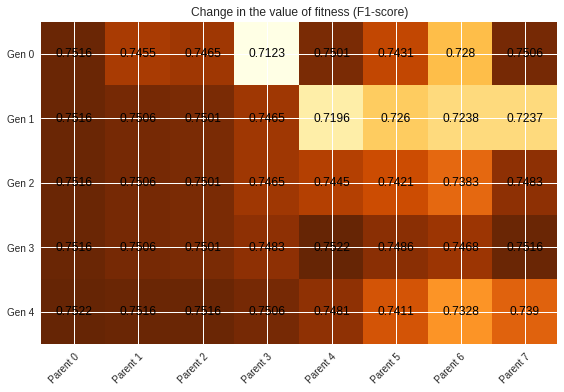

In [0]:
#visualize the change in fitness of the various generations and parents
plot_parameters(numberOfGenerations, numberOfParents, fitnessHistory, "fitness (F1-score)")

In [0]:
#Look at individual parameters change with generation
#Create array for each parameter history (Genration x Parents)
learnigRateHistory = populationHistory[:, 0].reshape([numberOfGenerations+1, numberOfParents])
nEstimatorHistory = populationHistory[:, 1].reshape([numberOfGenerations+1, numberOfParents])
maxdepthHistory = populationHistory[:, 2].reshape([numberOfGenerations+1, numberOfParents])
minChildWeightHistory = populationHistory[:, 3].reshape([numberOfGenerations+1, numberOfParents])
gammaHistory = populationHistory[:, 4].reshape([numberOfGenerations+1, numberOfParents])
subsampleHistory = populationHistory[:, 5].reshape([numberOfGenerations+1, numberOfParents])
colsampleByTreeHistory = populationHistory[:, 6].reshape([numberOfGenerations+1, numberOfParents])

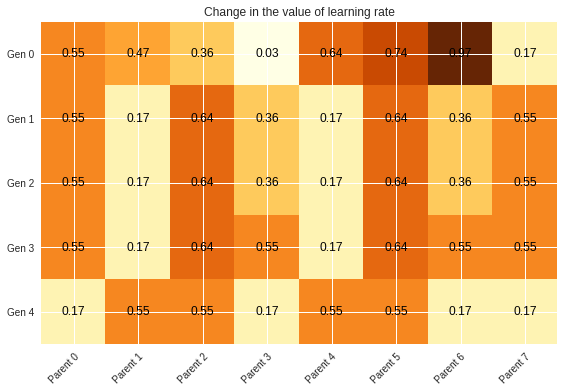

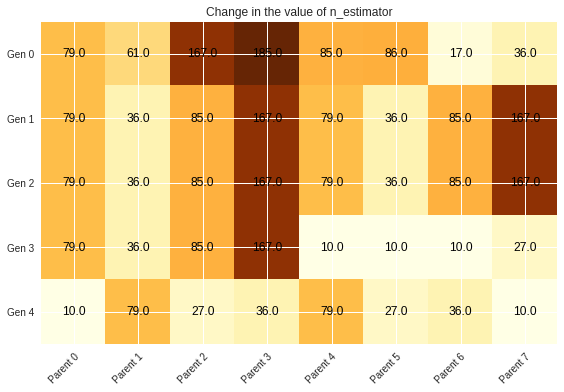

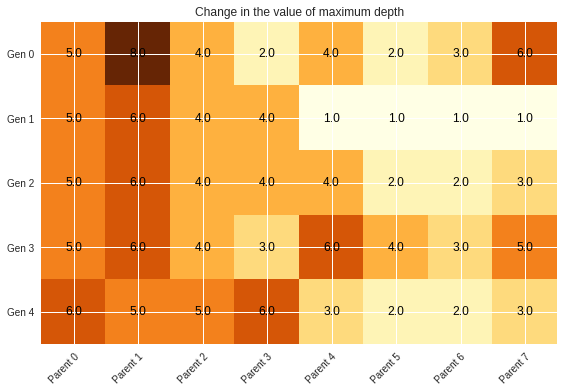

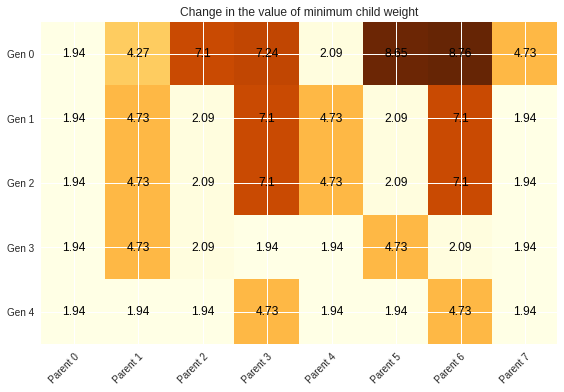

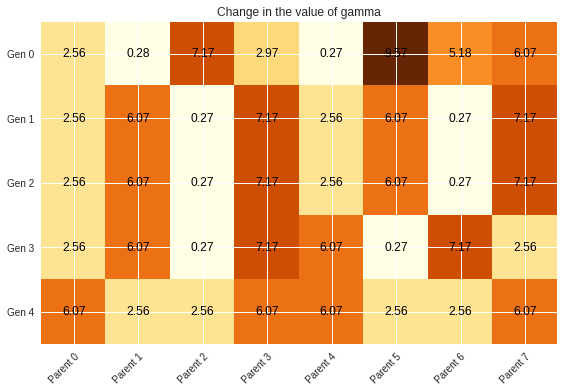

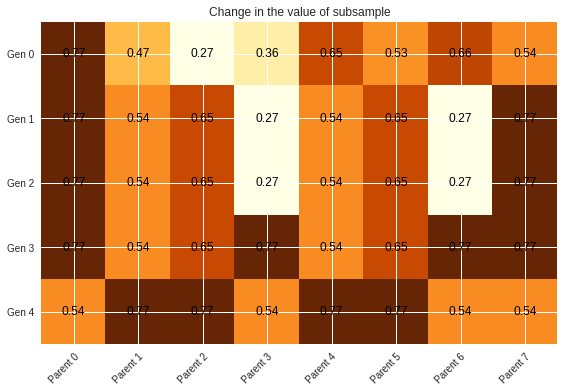

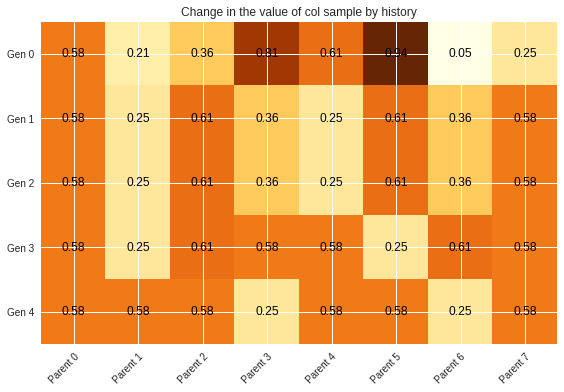

In [0]:
#generate heatmap for each parameter
plot_parameters(numberOfGenerations, numberOfParents, learnigRateHistory, "learning rate")
plot_parameters(numberOfGenerations, numberOfParents, nEstimatorHistory, "n_estimator")
plot_parameters(numberOfGenerations, numberOfParents, maxdepthHistory, "maximum depth")
plot_parameters(numberOfGenerations, numberOfParents, minChildWeightHistory, "minimum child weight")
plot_parameters(numberOfGenerations, numberOfParents, gammaHistory, "gamma")
plot_parameters(numberOfGenerations, numberOfParents, subsampleHistory, "subsample")
plot_parameters(numberOfGenerations, numberOfParents, colsampleByTreeHistory, "col sample by history")

# Testing

In [0]:
model_file_ids = ['1F4ONz6EEh-KojZTilrcjBsWXA89fvblq', '166gELhGcUW69T3NPxouzjQtoh8-QTvtB', '1osO0dYb-XFDA_GiPQ1apfGEsdmMDGlz7', '1tLEbwcjTCsnPkq6orrn3z63PD_cs0pHw', '1cSVKW2m4wF4c2r3BwLTwv-3fQOE4C1Bd', '1MpYUnUiz12YBKW3Q8R36CzlAIRDPXs86', '19p-mwNi6-6iyjxRImrMBG-I4Wr9wxDRX', '1IA8ILF6TDg2xCsYHRcTbIpE35_ntYWoy', '12KcUlUCzfyHdMaWsO6jxzVuaCvZXb9aq']
model_file_names = ['cnn_td_quora.h5', 'cnn_td_quora.json', 'siamese_rnn_quora.h5', 'siamese_rnn_quora.json', 'super_siamese_quora.h5', 'super_siamese_quora.json', 'xgb_quora', 'lsa1', 'lsa2']

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [123]:
for each_id, each_name in zip(model_file_ids, model_file_names):
    download = drive.CreateFile({'id':each_id})
    download.GetContentFile(each_name)

W0403 06:44:45.523919 140716940674944 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNo

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True)

In [0]:
svd_model = TruncatedSVD(n_components=300,
                         algorithm='randomized',
                         n_iter=10, random_state=42)

In [0]:
lsa_model1 = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])

In [0]:
lsa_model2 = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])

In [0]:
lsa_1 = lsa_model1.fit_transform(sentences_1[:1000])
lsa_2 = lsa_model2.fit_transform(sentences_2[:1000])

In [0]:
X_scores['lsa'] = get_scores(lsa_1, lsa_2, 1000)

**Word2vec**

In [0]:
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

In [0]:
google_model = KeyedVectors.load_word2vec_format(google_embeddings, binary=True)
#wiki_model = KeyedVectors.load_word2vec_format("models/pretrained/glove/wiki/wiki.300d.txt", binary=False)
#common_crawl_model = KeyedVectors.load_word2vec_format("models/pretrained/glove/common_crawl/common_crawl.300d.txt", binary=False)

In [0]:
def sentence_vectorizer(model, sentence):
    vectors =[]
    num = 0
    for i in sentence.split():
        try:
            if num == 0:
                vectors = model[i]
            else:
                vectors = np.add(vectors, model[i])
            num += 1
        except:
            pass
    return np.array(vectors) / num

In [0]:
sent_vec1 = []
for each in sentences_1[:1000]:
    temp = sentence_vectorizer(google_model, each)
    if temp.shape[0] != 0:
        sent_vec1.append(temp)
    else:
        sent_vec1.append(np.zeros((300,)))
sent_vec1 = np.asarray(sent_vec1)

In [0]:
sent_vec2 = []
for each in sentences_2[:1000]:
    temp = sentence_vectorizer(google_model, each)
    if temp.shape[0] != 0:
        sent_vec2.append(temp)
    else:
        sent_vec2.append(np.zeros((300,)))
sent_vec2 = np.asarray(sent_vec2)

In [131]:
sent_vec2.shape

(1000, 300)

In [0]:
del google_model

In [0]:
X_scores['sent vector'] = get_scores(sent_vec1, sent_vec2, 1000)

In [0]:
del sent_vec1
del sent_vec2

**InferSent**

In [0]:
import torch
import numpy as np
from random import randint

In [0]:
from iku.methods.infersent.models import InferSent
model_version = 2
params_model = {'bsize': 128, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': model_version}
model = InferSent(params_model)
model.load_state_dict(torch.load(infersent_embeddings))

In [0]:
use_cuda = True
model = model.cuda() if use_cuda else model # Keep it on CPU or put it on GPU

In [0]:
W2V_PATH = infersent_crawl_embeddings
model.set_w2v_path(W2V_PATH)

In [141]:
model.build_vocab_k_words(K=100000)

Vocab size : 100000


In [0]:
X_scores['sentence vector'] = []

In [143]:
infersent_1 = model.encode(sentences_1[:1000], bsize=128, tokenize=True, verbose=True)
infersent_2 = model.encode(sentences_2[:1000], bsize=128, tokenize=True, verbose=True)
X_scores['sentence vector'].extend(get_scores(infersent_1, infersent_2, 1000))

Nb words kept : 6825/7171 (95.2%)
Speed : 1085.3 sentences/s (gpu mode, bsize=128)
Nb words kept : 7043/7351 (95.8%)
Speed : 1859.4 sentences/s (gpu mode, bsize=128)


In [0]:
del model
del infersent_1
del infersent_2

**Sentence Encoder**

In [0]:
import tensorflow as tf
import tensorflow_hub as hub

W0403 04:46:39.137001 140716940674944 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [0]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [0]:
embed = hub.Module(module_url)

Instructions for updating:
Colocations handled automatically by placer.


W0403 04:46:53.535814 140716940674944 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
X_scores['sentence encoder'] = []

In [0]:
# Run in cpu since GPU wont help
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )
sess = tf.Session()

In [0]:
with tf.Session(config=config) as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    sentences_embeddings_1 = session.run(embed(sentences_1[:1000].tolist()))
    sentences_embeddings_2 = session.run(embed(sentences_2[:1000].tolist()))
    X_scores['sentence encoder'].extend(get_scores(sentences_embeddings_1, sentences_embeddings_2, sentences_embeddings_1.shape[0]))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0403 04:47:05.869256 140716940674944 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0403 04:47:08.391034 140716940674944 saver.py:1483] Saver not created because there are no variables in the graph to restore


In [0]:
del embed

**Doc2vec**

In [0]:
from gensim.models import Doc2Vec


In [0]:
model = Doc2Vec.load(dbow_wiki_embeddings)

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:566: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [0]:
length = 1000

In [0]:
sentence_vector1 = []
for i in range(length):
    sentence_vector1.append(model.infer_vector(sentences_1[i].split()))
sentence_vector1 = np.asarray(sentence_vector1)

In [0]:
sentence_vector2 = []
for i in range(length):
    sentence_vector2.append(model.infer_vector(sentences_2[i].split()))
sentence_vector2 = np.asarray(sentence_vector2)

In [0]:
X_scores['document vectors'] = get_scores(sentence_vector1, sentence_vector2, length)

In [0]:
del model
del sentence_vector1
del sentence_vector2

**XGBOOST**

In [0]:
import xgboost as xgb

In [0]:
import joblib
xgb_model = joblib.load("xgb_quora")

In [0]:
X1 = np.asarray(X_scores['lsa'])
X2 = np.asarray(X_scores['sentence encoder'])
X3 = np.asarray(X_scores['sent vector'])
X4 = np.asarray(X_scores['sentence vector'])
X5 = np.asarray(X_scores['document vectors'])

In [148]:
X5.shape

(1000, 4)

In [0]:
X = np.append(X1,np.append(X2, np.append(X3, np.append(X4, X5, axis=1), axis=1), axis=1), axis=1)

In [0]:
X

array([[ 0.08059286,  3.24612956,  0.34791035,  0.34791035,  0.71501803,
        13.39896015,  0.75495946,  0.75495954,  0.39513218, 38.50582027,
         2.77663946,  2.77663958,  0.98860502,  7.78655523,  0.27962661,
         0.27962861,  0.71676117,  8.51804166,  0.63390481,  0.63390481]])

In [0]:
pred1 = xgb_model.predict(xgb.DMatrix(X))

In [151]:
pred1

array([6.83399141e-01, 1.35944724e-01, 4.59594905e-01, 7.50924088e-03,
       7.98606277e-02, 5.82917690e-01, 1.96073833e-03, 6.31801128e-01,
       6.71347916e-01, 5.72004914e-01, 2.98061874e-04, 5.54380774e-01,
       7.22362459e-01, 6.84458554e-01, 4.97586519e-01, 1.93417355e-01,
       6.84632719e-01, 5.46982527e-01, 7.27621794e-01, 6.16017938e-01,
       3.69608492e-01, 4.34398204e-01, 6.94802582e-01, 3.83765921e-02,
       2.76055992e-01, 4.95196164e-01, 5.21036804e-01, 4.35658157e-01,
       7.04088271e-01, 5.48824906e-01, 4.30451423e-01, 4.21625048e-01,
       5.62313020e-01, 2.33760657e-04, 6.91132724e-01, 2.00272813e-01,
       4.61408705e-01, 1.43080741e-01, 6.46532238e-01, 9.29001495e-02,
       7.11024463e-01, 7.23295629e-01, 5.85266292e-01, 1.68653861e-01,
       8.10994387e-01, 6.52151942e-01, 3.63051135e-04, 9.78482515e-02,
       6.34009123e-01, 5.91271162e-01, 3.36157948e-01, 6.60332739e-01,
       4.85545374e-04, 3.55310261e-01, 8.88126786e-04, 9.47131217e-02,
      

**Neural Networks**

In [0]:
from keras.models import model_from_json
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import backend

In [0]:
import pickle

In [0]:
with open('cnn_time_distributed.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [0]:
test_sentences1 = tokenizer.texts_to_sequences(sentences_1[:1000])
test_sentences2 = tokenizer.texts_to_sequences(sentences_2[:1000])

In [0]:
max_question_len= 97
test_1 = pad_sequences(test_sentences1,
                              maxlen = max_question_len)

In [0]:
test_2 = pad_sequences(test_sentences2,
                              maxlen = max_question_len)

**CNN and TimeDistributed**

In [0]:
with open('cnn_td_quora.json', 'r') as json_file:
    loaded_model = json_file.read()

In [173]:
cnn_td_model = model_from_json(loaded_model)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0403 07:11:51.284765 140716940674944 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
cnn_td_model.load_weights("cnn_td_quora.h5")

In [0]:
pred_2 = cnn_td_model.predict([test_1, test_2, test_1, test_2])


**Siamese Network(RNN)**


In [0]:
with open('siamese_rnn_quora.json', 'r') as json_file:
    loaded_model = json_file.read()

In [0]:
siamese_rnn_model = model_from_json(loaded_model, custom_objects={"backend": backend})

In [0]:
siamese_rnn_model.load_weights("siamese_rnn_quora.h5")

In [0]:
pred_3 = siamese_rnn_model.predict([test_1, test_2])

**Siamese Network(CNN and RNN)**

In [0]:
with open('super_siamese_quora.json', 'r') as json_file:
    loaded_model = json_file.read()

In [0]:
super_siamese_model = model_from_json(loaded_model, custom_objects={"AttentionWithContext": AttentionWithContext})

In [0]:
super_siamese_model.load_weights("super_siamese_quora.h5")

In [0]:
pred_4 = super_siamese_model.predict([test_1, test_2])

# Result

In [0]:
x = []
for i in range(20):
  x.append([questions1[i], questions2[i], (pred1[i] + pred_2[i][0] + pred_3[i][0] + pred_4[i][0])/4])

In [212]:
pd.DataFrame(x).head(20)

,0,1,2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.560825
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.231400
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.432666
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.117028
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.055409
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",0.413934
6,Should I buy tiago?,What keeps childern active and far from phone ...,0.064391
7,How can I be a good geologist?,What should I do to be a great geologist?,0.700075
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0.747250
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0.229920
